### IDs:
Insert yours IDs to the cell below

ID #1:

ID #2:


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Correlations (14 points)

Provide example datapoints matching the following descriptions. Each example should be constructed over n=50 datapoints. Provide a table description of the example data as well as a jointplot (see example below).
If you think that the situation described is impossible then clearly explain why (you don’t need to give a rigorous proof).<br>
Pearson(x,y) = Pearson correlation<br>
τ(x,y) = Kendall rank correlation<br>
ρ(x,y) = Spearman rank correlation <br>
<img src="jointplot.png">

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import uniform

#### 1.A
Data in which  $Pearson(x,y) < -0.9$ but where $n-1$ points can be selected so that for the vectors restricted to those we have $Pearson(x_{n-1},y_{n-1}) > 0.9$

Number of points: 50
Pearson correlation (all points): -0.995
Pearson correlation (without outlier): 0.992


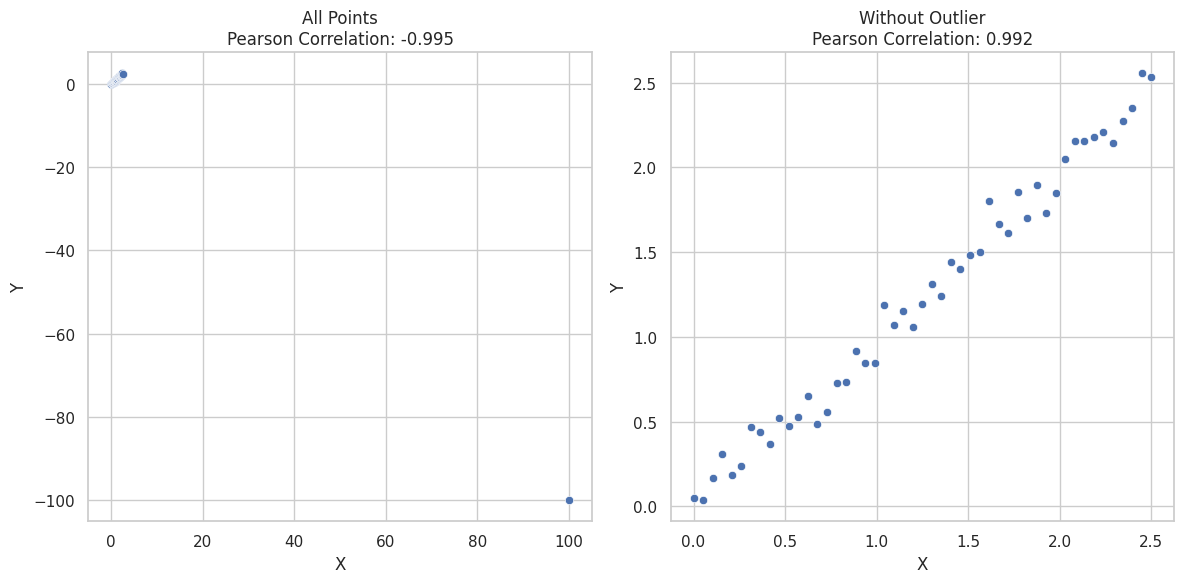

In [32]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate base data with strong positive correlation (49 points)
n = 49
x_base = np.linspace(0, 5, n)  # Reduced range to make base points more clustered
noise = np.random.normal(0, 0.2, n)  # Further reduced noise
y_base = x_base + noise

# Scale the base points to be smaller
x_base = x_base * 0.5
y_base = y_base * 0.5

# Create the outlier point - making it much more extreme
x_outlier = np.array([100])  # Much more extreme x value
y_outlier = np.array([-100])  # Much more extreme y value

# Combine base data and outlier
x = np.concatenate([x_base, x_outlier])
y = np.concatenate([y_base, y_outlier])

# Create DataFrame for easier plotting
df = pd.DataFrame({
    'x': x,
    'y': y
})

# Calculate correlations
pearson_all = stats.pearsonr(x, y)[0]
pearson_base = stats.pearsonr(x_base, y_base)[0]

# Create the plot
plt.figure(figsize=(12, 6))

# Create two subplots
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='x', y='y')
plt.title(f'All Points\nPearson Correlation: {pearson_all:.3f}')
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df.iloc[:-1], x='x', y='y')
plt.title(f'Without Outlier\nPearson Correlation: {pearson_base:.3f}')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()

# Print numerical results
print(f"Number of points: {len(x)}")
print(f"Pearson correlation (all points): {pearson_all:.3f}")
print(f"Pearson correlation (without outlier): {pearson_base:.3f}")

# Optional: Save the data
np.savetxt('correlation_data.csv', np.column_stack((x, y)), delimiter=',', header='x,y', comments='')

#### 1.B
Data in which  $\rho(x,y) = 1$ but where $n-1$ points can be selected so that for the vectors restricted to those we have $\rho(x_{n-1},y_{n-1}) < 0.9$

In [ ]:
'''
If we have ρ = 1 for all points, this means:

The ranks of x and y must form a perfect monotonic relationship
Each point have to maintain its relative position in both x and y rankings

Now, if we remove one point and want ρ < 0.9, this means:
  The remaining points must significantly deviate from a perfect monotonic relationship
  Removing this one point must change the relative ordering of the remaining points

However, there's a contradiction here:
If we have a perfect rank correlation (ρ = 1) with all points:
  For any point i: if xi < xj then yi < yj
  This ordering must be true for ALL pairs of points

When we remove one point:
  The relative ordering of all remaining pairs must stay the same
  Removing a point cannot change whether yi < yj for any others pair of points
  The ranks might shift by 1, due to the removal, but their relative order cannot change

Therefore, this is then impossible.
If we have ρ = 1 with all points,
removing any single point cannot change the Spearman correlation to less than 1,
because the relative ordering of all remaining pairs stays the same.

'''

#### 1.C
Data with τ(x,y) > ρ(x,y) + 0.45

In [8]:
'''
It's impossible to have τ(x,y) > ρ(x,y) + 0.45
                    <=> τ(x,y) - ρ(x,y) > 0.45

Kendall's tau (τ) and Spearman's rho (ρ) are both rank correlation measures
The two measures are between [-1, 1]

Spearman's correlation is the Pearson correlation of the ranked data,
while Kendall's tau is based on the number of concordant and discordant pairs.
In general, |τ(x, y)| ≤ |ρ(x, y)|

Therefore, the maximum difference between them will be 0.

Let's consider the case when ρ = 1, the maximum possible value.
τ will be equal to or less than 1, thus the difference will be 0.

=> For any possible value of ρ, τ will be equal or less, therefore this inequality cannot be satisfied.


The maximum possible value of the difference is 1 - (-1) = 0
No matter the configuration of the data,
it is impossible to find a dataset where the difference between the two is larger than 0.45
'''

"\nIt's impossible to have τ(x,y) > ρ(x,y) + 0.45\n                    <=> τ(x,y) - ρ(x,y) > 0.45\n\nKendall's tau (τ) and Spearman's rho (ρ) are both rank correlation measures\nThe two measures are between [-1, 1]\n\nSpearman's correlation is the Pearson correlation of the ranked data, \nwhile Kendall's tau is based on the number of concordant and discordant pairs.\nIn general, |τ(x, y)| ≤ |ρ(x, y)|\n\nTherefore, the maximum difference between them will be 0. \n\nLet's consider the case when ρ = 1, the maximum possible value.\nτ will be equal to or less than 1, thus the difference will be 0.\n\n=> For any possible value of ρ, τ will be equal or less, therefore this inequality cannot be satisfied.\n\n\nThe maximum possible value of the difference is 1 - (-1) = 0\nNo matter the configuration of the data, \nit is impossible to find a dataset where the difference between the two is larger than 0.45\n\n"

In [ ]:
'''
WITH FORMULA
This is mathematically impossible due to the following relationship between Kendall's tau (τ) and Spearman's rho (ρ):
For any dataset, these correlation coefficients are bound by the inequality:
3τ - 2ρ ≤ 1

This can be rearranged to:
τ ≤ (2ρ + 1)/3
Therefore:
τ - ρ ≤ (2ρ + 1)/3 - ρ
= (2ρ + 1 - 3ρ)/3
= (1 - ρ)/3
≤ 1/3 (since ρ ≥ -1)
This means that τ can never exceed ρ by more than 1/3 (approximately 0.333).
Your requirement that τ(x,y) > ρ(x,y) + 0.45 would violate this mathematical bound, as 0.45 > 1/3.

'''

In [ ]:
'''
If τ=1, then all apirs are perfectly concordant.
  Then ρ=1, because there is no discordance or discrepancy.

If τ<1, to have τ>ρ+0.45, we should have ρ very small (close to 0)
  But if the rank differences increase and then decrease ρ,
  this means that the pairs become less concordant, which also reduces τ
  => τ and ρ are strongly structurally linked: any decrease in concordance affects both simultaneously.

τ>ρ+0.45 is then impossible
'''

#### 1.D
Data with τ(x,y) < ρ(x,y) – 0.45

In [ ]:

'''
It's impossible to have τ(x,y) < ρ(x,y) – 0.45
                    <=> τ(x,y) - ρ(x,y) < -0.45

Kendall's tau (τ) and Spearman's rho (ρ) are both rank correlation measures.
Both measures lie in the range [-1, 1].

The relationship between Kendall's tau and Spearman's rho is given by:

-1 ≤ τ ≤ ρ ≤ 1

Therefore, the maximum possible difference between τ and ρ is 0.

τ(x,y) - ρ(x,y) < -0.45 is impossible.


The maximum possible value of the difference is 1 - (-1) = 0

No matter the configuration of the data,
it is impossible to find a dataset where the difference between the two is less than -0.45

'''

#### 1.E
Data with Pearson(x,y) < ρ(x,y) – 0.6

Pearson Correlation: -0.136
Spearman Correlation: -0.104
Difference: -0.032
Condition not met. Try adjusting noise or non-linearity.


#### 1.F
Data with Pearson(x,y) > ρ(x,y) + 1.2

#### 1.G
Data with τ(x,y) < ρ(x,y) – 1.2

In [ ]:
'''
Both Kendall's tau (τ) and Spearman's rho (ρ) are bounded by [-1, 1], and they are related by several inequalities:

From Daniels (1944), we know that:
ρ ≤ 3τ <=> τ ≥ ρ/3
τ(x,y) < ρ(x,y) - 1.2 would mean: τ < ρ - 1.2

Therefore:
ρ/3 ≤ τ < ρ - 1.2

This means:
ρ/3 < ρ - 1.2
-2ρ/3 < -1.2
ρ > 1.8

However, since ρ is bounded by [-1, 1], it's impossible to have ρ > 1.8
'''

### Question 2 - Analysis of the UCI Heart Disease dataset  (38 points)

Perform data analysis on the UCI Heart Disease Dataset
References:
1. Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
2. David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
3. Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

Use the following links to find the details of the data:
1. https://archive.ics.uci.edu/ml/datasets/heart+disease
2. https://www.kaggle.com/ronitf/heart-disease-uci

In the follwong cells write a report for your analysis. In your report provide a clear description of the analysis methods and of the results. This should include a graphical representation of the results and the conclusions. Provide p-values or other indicators of the statistical significance where appropriate. <br>
Design your report to be concise but still cover interesting findings.

There are missing values in the data. Find them and impute them by using the median (for numerical features) or the mode (for categorical features) value of the relevant feature (column).
Address the following questions:
* Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean.
* Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.
* For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).
* Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?
* For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

Suggest, state and address at least one original question.


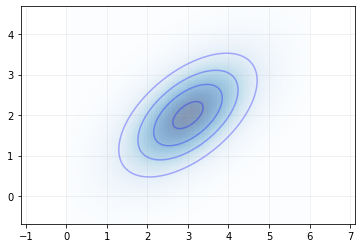

In [ ]:
# Example code for bivariate pdfs
from scipy.stats import multivariate_normal as mn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_2d_Gaussian_pdf(means, cov):
    n = 100
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots()
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),
               levels=[0.05, 0.1, 0.15, 0.2], alpha=0.3, colors='b')
    ax.axis('equal')
    ax.grid(alpha=0.2)
    plt.show()

means = [3, 2]
cov = [[1, 0.5], [0.5, 0.8]]
plot_2d_Gaussian_pdf(means, cov)

### Question 3 - Heavy Tailed Distributions and the Exponential Distribution (16 points)

### Heavy Tailed Distributions

Recall the definition of Heavy Tailed distribution from the lectures.

*A distribution is said to have a heavy right tail if its tail probabilities vanish slower than any exponential*
$$ \forall t>0, \lim_{x\to\infty} e^{tx}P(X>x)=\infty $$

Does the standard log-normal distribution have a heavy right tail? prove your answer.

In [ ]:
'''
The standard log-normal distribution has a probability density function (PDF) given by:
f(x) = 1 / (x * σ * sqrt(2π)) * exp(-(ln(x) - μ)^2 / (2σ^2))

where μ and σ are the mean and standard deviation of the underlying normal distribution,
and for the standard log-normal, μ = 0 and σ = 1.

We want to examine the limit:
lim (x→∞)  exp(tx) * P(X > x)
where X is a standard log-normal random variable.

P(X > x) can be expressed as the integral of the PDF from x to ∞:
P(X > x) = ∫[x, ∞] f(u) du

Using the approximation for large x, the tail probability P(X>x) of the log-normal distribution is approximately:
P(X > x) ≈ 1 / (x * sqrt(2π)) * exp(-(ln(x))^2/2)

Therefore the limit we are looking for is:
lim (x→∞) exp(tx) * (1 / (x * sqrt(2π))) * exp(-(ln(x))^2 / 2)
  = lim (x→∞) (1 / (x * sqrt(2π))) * exp(tx - (ln(x))^2 / 2)

Since (ln(x))^2 grows much slower than x as x approaches infinity,
the exponential term exp(tx - (ln(x))^2 / 2) will dominate and grow unbounded.
This is because the linear term 'tx' will overwhelm the quadratic term '- (ln x)^2 / 2' in the exponent.

Thus:
lim (x→∞) exp(tx) * P(X > x) = ∞

Conclusion:
The standard log-normal distribution has a heavy right tail.

'''

### Special Properties of the Exponential Distribution

Let $X_1 \sim exp(\lambda_1)$ and $X_2 \sim exp(\lambda_2)$ be two independent exponential random variables.

Calculate $P(X_1 < X_2)$.

In [ ]:
'''

Calculate P(X1 < X2)
P(X1 < X2) = ∫∫[0,∞) I(x1 < x2) * f(x1) * f(x2) dx1 dx2
where I(x1 < x2) is an indicator function that equals 1 if x1 < x2 and 0 otherwise,
f(x1), f(x2) are the probability density functions of X1 and X2 respectively.

f(x1) = λ1 * exp(-λ1 * x1)
f(x2) = λ2 * exp(-λ2 * x2)

P(X1 < X2) = ∫[0,∞) [∫[0,x2] λ1 * exp(-λ1 * x1) * λ2 * exp(-λ2 * x2) dx1] dx2
           = ∫[0,∞)   [∫[0,x2] λ1 * exp(-λ1 * x1) dx1 ]     * λ2 * exp(-λ2 * x2)] dx2

First:
∫[0,x2] λ1 * exp(-λ1 * x1) dx1 = [-exp(-λ1 * x1)][0, x2] = 1 - exp(-λ1 * x2)

Second:
P(X1 < X2) = ∫[0,∞) λ2 * exp(-λ2 * x2) * (1 - exp(-λ1 * x2)) dx2
           = ∫[0,∞) λ2 * exp(-λ2 * x2) dx2 - ∫[0,∞) λ2 * exp(-(λ1 + λ2) * x2) dx2
           = [ -exp(-λ2 * x2) ][0, ∞) - [ -exp(-(λ1 + λ2) * x2) / (λ1 + λ2) ][0, ∞)
           = 1 - λ2 / (λ1 + λ2)
           = λ1 / (λ1 + λ2)
'''

### Question 4 - CLT for Markov chains (16 points)

In this exercise you will construct trajectories of Markovian dice rolling results in the following way.<br>
The first roll, X0, is Unif(1..6)<br>
After i rolls are determined the i+1st, Xi+1, is drawn according to the row that corresponds to the value of Xi in the matrix T below. <br>
In other words, T is the transition matrix of a Markov chain and the initial distribution is uniform.

\begin{equation*}
T =
\begin{pmatrix}
0.4 & 0.2 & 0.1 & 0 & 0.1 & 0.2 \\
0.2 & 0.4 & 0.2 & 0.1 & 0 & 0.1 \\
0.1 & 0.2 & 0.4 & 0.2 & 0.1 & 0 \\
0 & 0.1 & 0.2 & 0.4 & 0.2 & 0.1 \\
0.1 & 0 & 0.1 & 0.2 & 0.4 & 0.2 \\
0.2 & 0.1 & 0 & 0.1 & 0.2 & 0.4
\end{pmatrix}
\end{equation*}

#### 4.A
Construct 1000 trajectories, each of length 30.
1. What do you expect the average value of all 30 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

##### 4.B
Construct 1000 trajectories, each of length 500.
1. What do you expect the average value of all 500 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

#### 4.C
Draw normal fit curves on your two histograms.

#### 4.D
Write a python code to calculate $Cov(X_0,X_i)$ for $i=1,..,500$ based on $\pi_0$ and $T$.

Compute the values for our case.

### Question 5 - Distributions (16 Points)

Let $X$ be a random variable. Consider the number $q$ so that $P(X\le q)=0.8$ (assume that such a value exists).

Consider a sample $\vec{x}(n) = x_1,...,x_n$ sampled independently from $X$. Denote the sorted observations by: $a_1 \le a_2 \le ... \le a_n$. Also assume that $n \ge 100$.

Let $R(\vec{x}(n))$ be the largest index $i \in {1,...,n}$ such that $a_i \le q$. If $a_1 > q$ then $R = 0$.

1. What is $P(R = 0)$?
1. What is the distribution of $R$?
1. Given $n$, write code that computes an index $\lambda (n)$ so that $P(a_{\lambda (n)} \le q) \ge 0.9$ and $P(a_{\lambda (n)+1} \le q) < 0.9$.
1. Let $X \sim Unif(0,1)$, $q$ as above and $n=100$. Compute $\lambda (n)$ as above. Run 200 experiments that calculate $a_{\lambda (n)}$ for independent drawing from $X$. How many times did you observe $a_{\lambda (n)} \le q$?

In [ ]:
'''
question 5.1. What is P(R = 0)?

P(R = 0) is the probability that all observations are greater than q
Since the observations are assumed  independent,
    P(R = 0) = ∑i  P(X_i > q) = P(X_1 > q)^n = (1 - P(X_1 <= q))^n = (1 - 0.8)^n = 0.2^n

Then P(R=0)=0.2^n

'''

In [ ]:
'''
question 5.2. What is the distribution of R?

R follows a binomial distribution with parameters n and p = P(X <= q) = 0.8

However, since R is defined as the largest index where a_i <= q, we can find P(R=k).
R=k means that a_k <= q and a_k+1 > q
This corresponds to k observations <= q and n-k > q
R has a distribution like to the binomial distribution

'''

In [50]:
#question 5.3. Given n, compute lambda(n) such that P(a_lambda(n) <= q) >= 0.9 and P(a_lambda(n)+1 <= q) < 0.9

def index_lambda(n):
    # For uniform distribution, a_i follows a Beta distribution (i,n-i+1)
    # Find lambda such that P(a_lambda <= q) >= 0.9 and P(a_lambda+1 <= q) < 0.9
    # For X ~ Unif(0,1), q = 0.8

    q = 0.8
    for l in range(1,n+1):
        prob = l/n
        if prob >= q:
          return l


In [58]:
# question 5.4. Let X ~ Unif(0,1), q as above and n=100.
# calculate  𝑎𝜆(𝑛)  for independent drawing from  𝑋 . How many times did you observe  𝑎𝜆(𝑛)≤𝑞 ?

n = 100
lambda_n = index_lambda(n)
print(f"Lambda({n}) = {lambda_n}")

cpt = 0
for _ in range(200):
    x = np.random.uniform(0, 1, n)  # Sample n values from the uniform distribution
    a = np.sort(x)
    if a[lambda_n-1] <= 0.8:
        cpt += 1

print(f"Number of times 𝑎𝜆(𝑛)≤𝑞 observed: {cpt} out of {200}")
#print(f"Observed probability of 𝑎𝜆(𝑛)≤𝑞: {cpt/200}")

Lambda(100) = 80
Number of times 𝑎𝜆(𝑛)≤𝑞 observed: 117 out of 200
Observed probability of 𝑎𝜆(𝑛)≤𝑞: 0.585
